In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load CSV
df = pd.read_csv("total_scores.csv")

# Extract model type from model_name
df['model_type'] = df['model_name'].apply(lambda x: x.split('_')[0].lower())

In [27]:
# Function to plot scores for a specific model type
def plot_model_scores(df_model, model_label):
    # Sort models by total_score ascending
    df_sorted = df_model.sort_values("pi_score", ascending=True)
    x = range(len(df_sorted))

    plt.figure(figsize=(20,10))  
    
    # Plot each rubric
    plt.plot(x, df_sorted['pi_score'], marker='o', label='Pi Score')
    plt.plot(x, df_sorted['consensus_score'], marker='o', label='Consensus Score')
    plt.plot(x, df_sorted['p_realism'], marker='o', label='Realism')
    plt.plot(x, df_sorted['p_prompt_adherence'], marker='o', label='Prompt Adherence')
    plt.plot(x, df_sorted['p_clarity'], marker='o', label='Clarity')
    plt.plot(x, df_sorted['p_factual_consistency'], marker='o', label='Factual Consistency')
    plt.plot(x, df_sorted['p_completeness'], marker='o', label='Completeness')
    plt.plot(x, df_sorted['p_technical_accuracy'], marker='o', label='Technical Accuracy')
    plt.plot(x, df_sorted['c_consensus_similarity'], marker='o', label='Consensus Similarity')
    plt.plot(x, df_sorted['c_prompt_similarity'], marker='o', label='Prompt Adherence')
    plt.plot(x, df_sorted['c_w_rep_inv'], marker='o', label='Word Repetition & Inversion')
    
    # X-axis labels
    plt.xticks(x, df_sorted['model_name'], rotation=90, ha='center')
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.title(f"{model_label.capitalize()} Model Scores Across Rubrics")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [28]:
# Separate DataFrames
df_openai = df[df['model_type'].str.contains('openai')]
df_llama  = df[df['model_type'].str.contains('llama')]
df_claude = df[df['model_type'].str.contains('claude')]

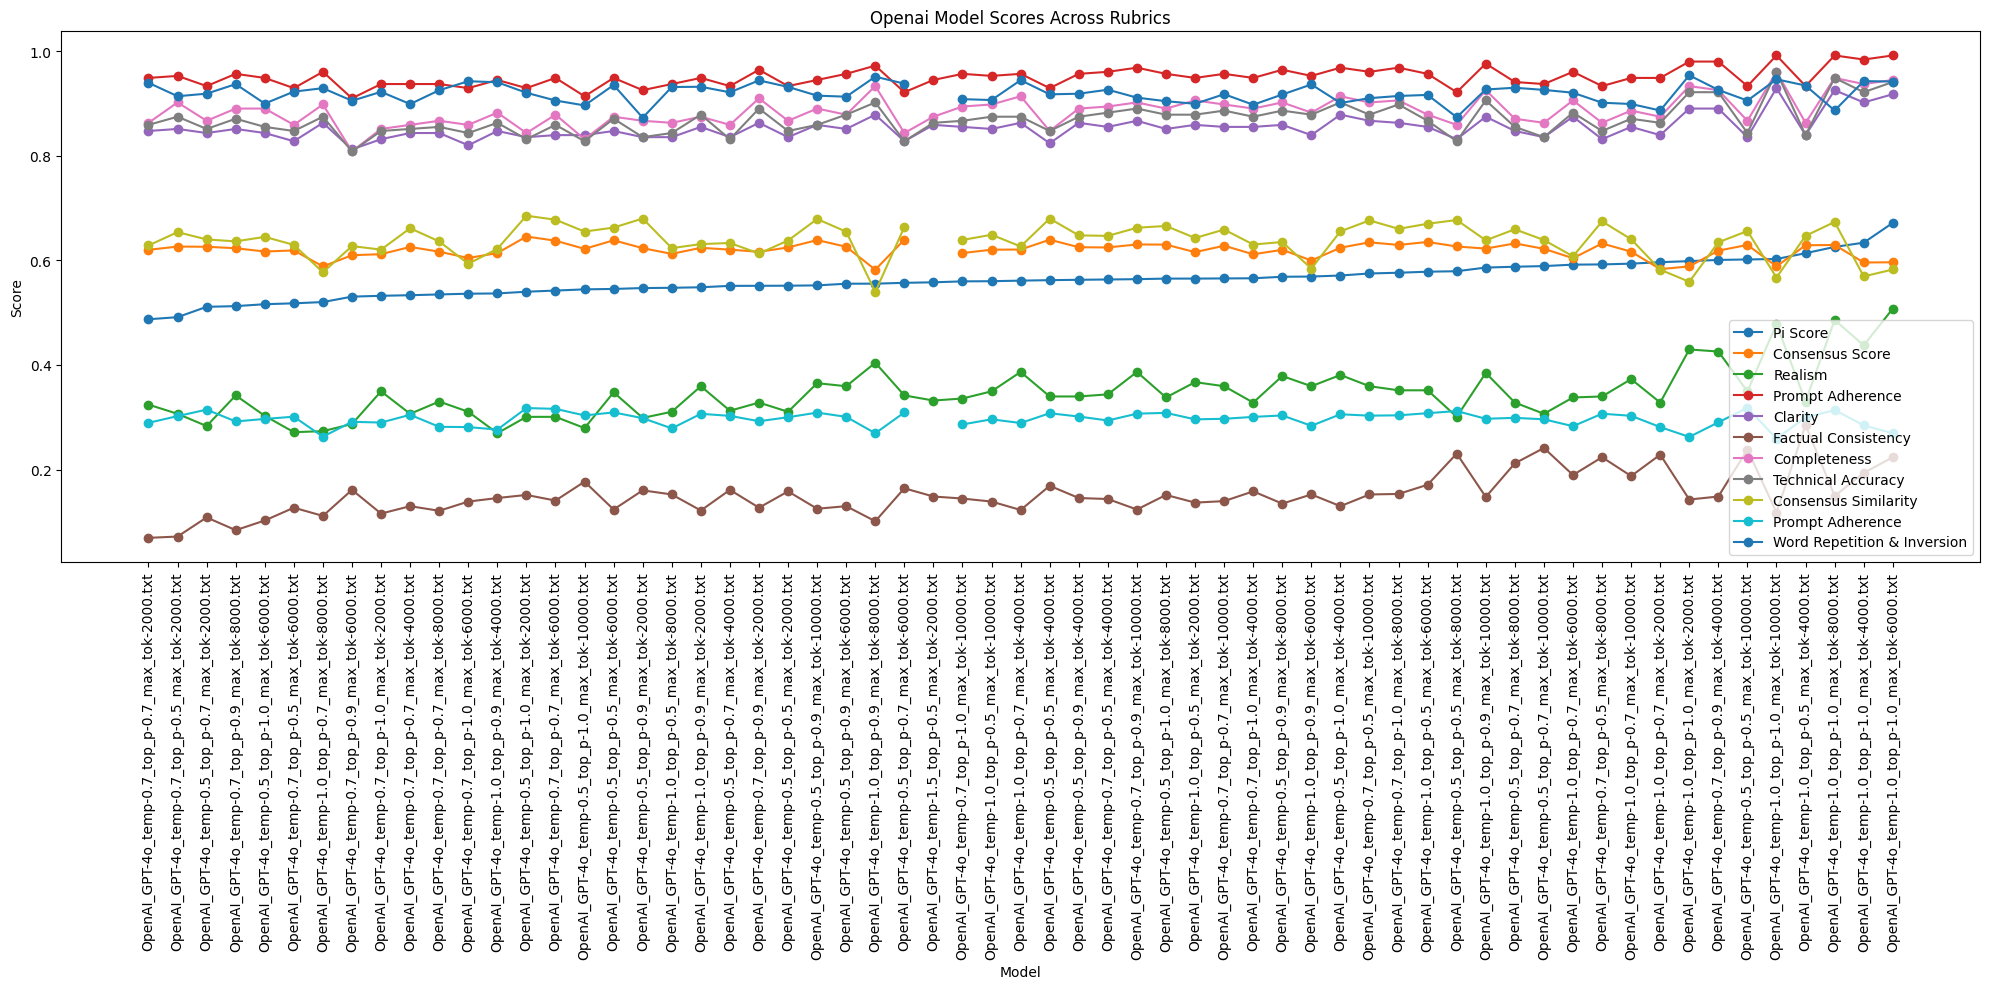

In [29]:
plot_model_scores(df_openai, "OpenAI")

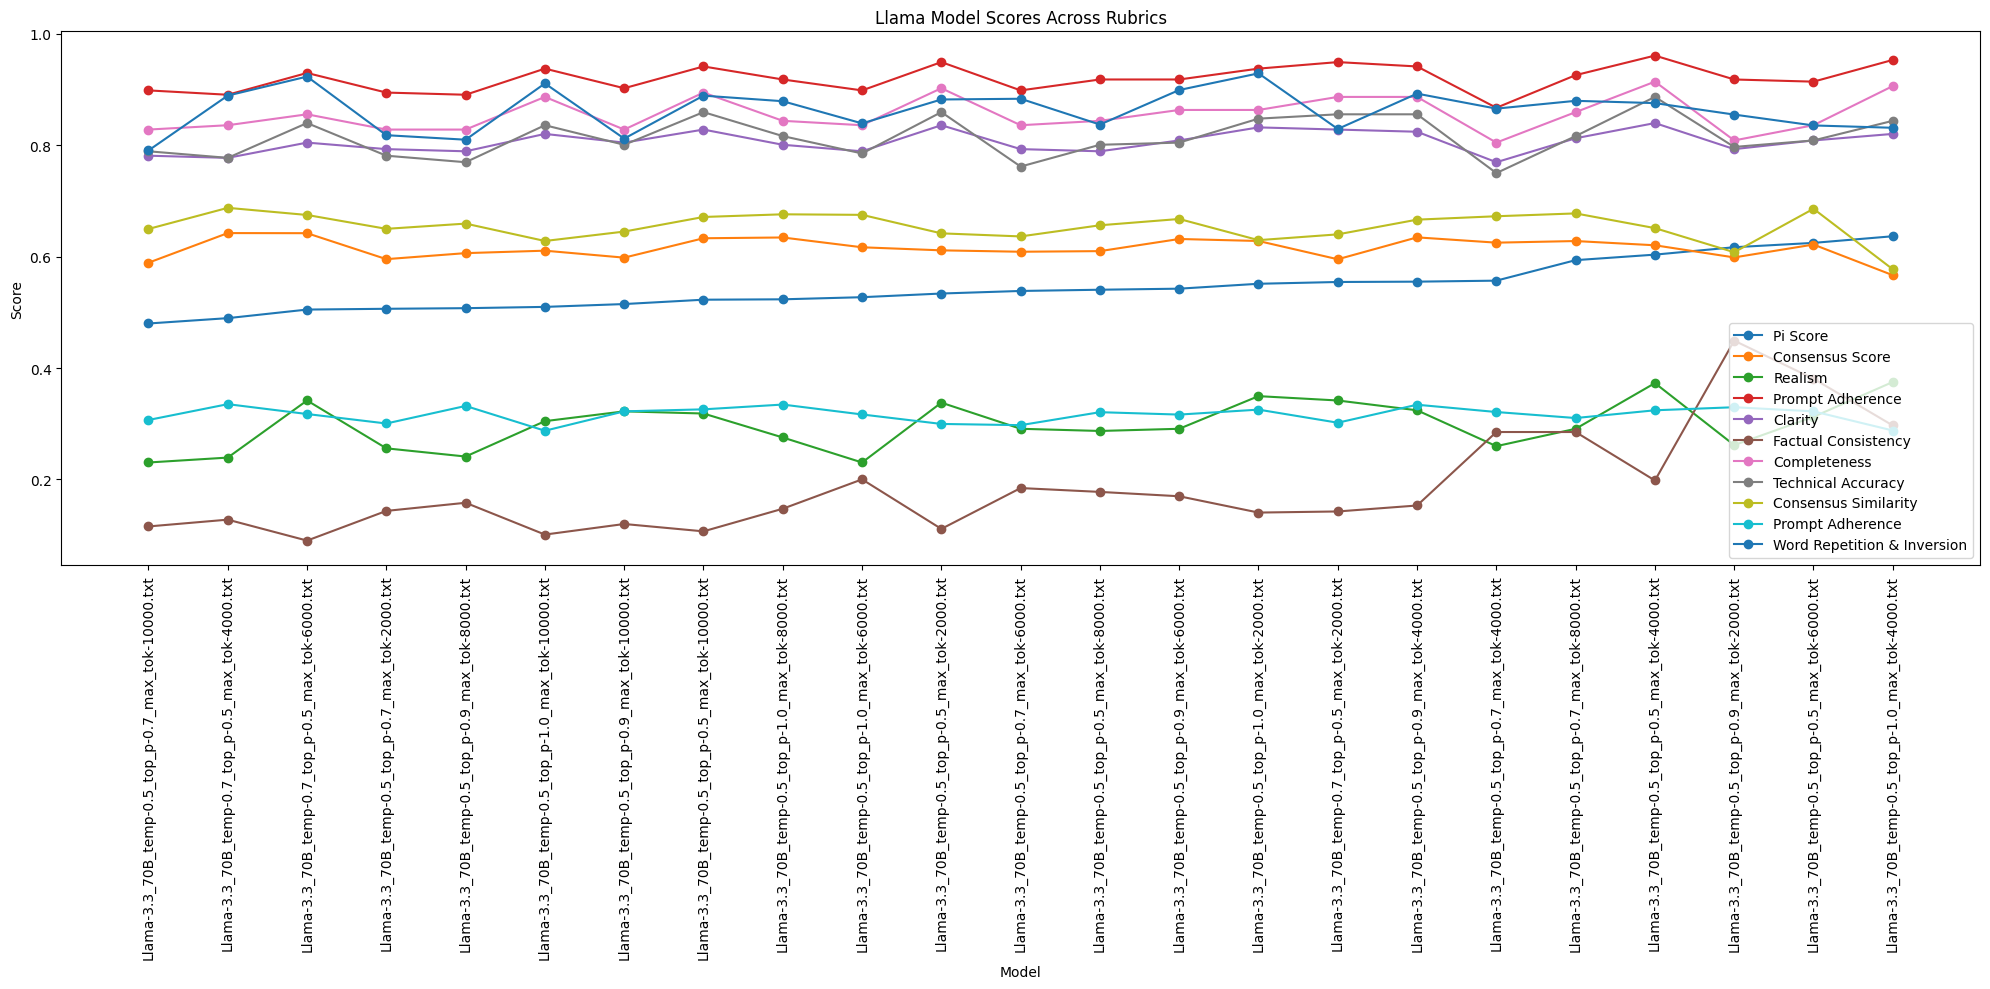

In [30]:
plot_model_scores(df_llama, "Llama")

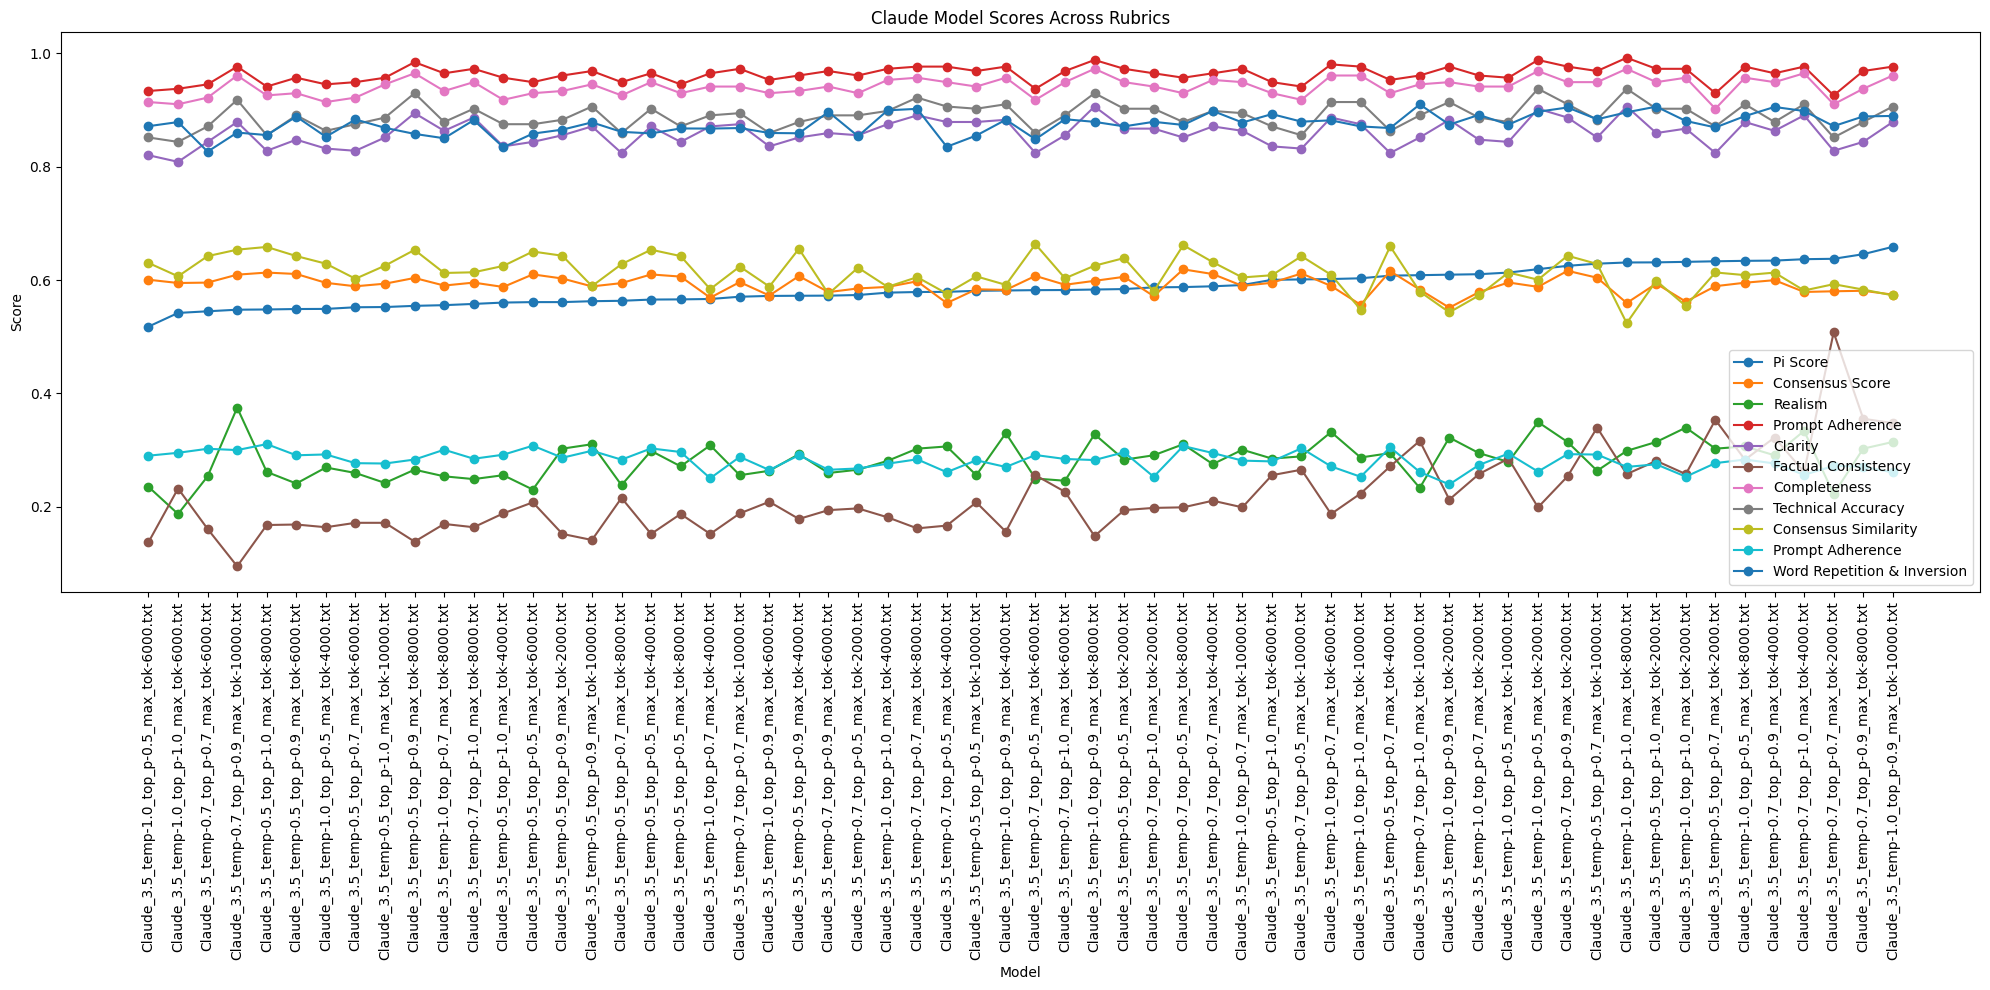

In [31]:
plot_model_scores(df_claude, "Claude")

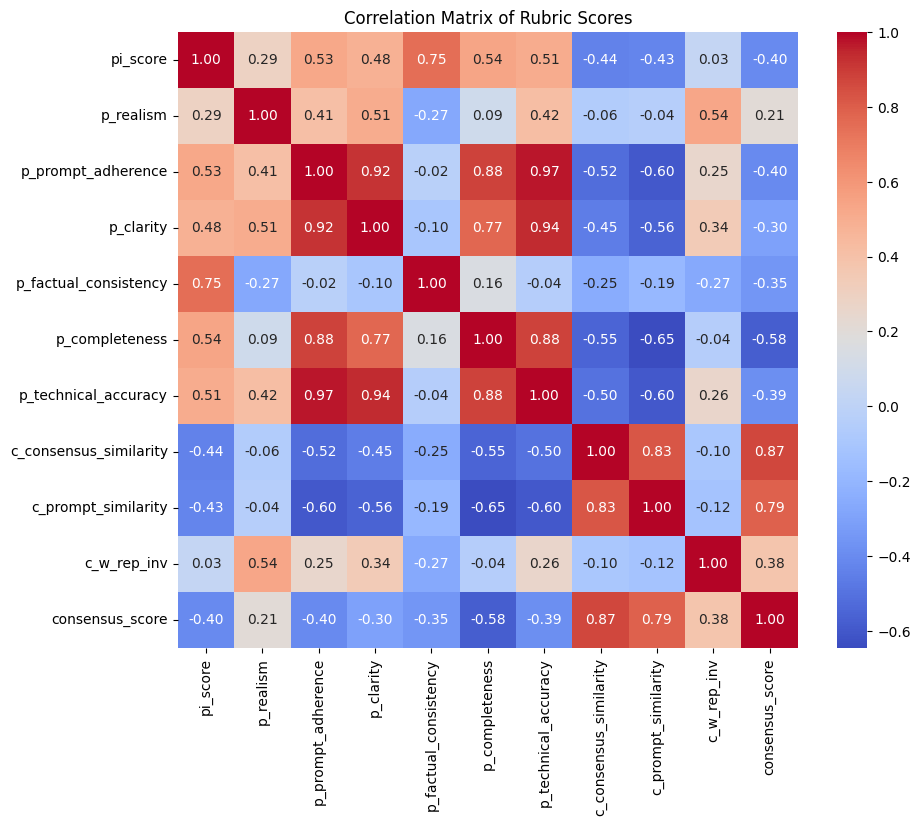

In [36]:
# Correlation Matrix

numeric_cols = df.drop(columns=['model_name', 'model_type'])
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Rubric Scores")
plt.show()

In [35]:
numeric_cols

,pi_score,p_realism,p_prompt_adherence,p_clarity,p_factual_consistency,p_completeness,p_technical_accuracy,c_consensus_similarity,c_prompt_similarity,c_w_rep_inv,consensus_score,model_type
0,0.5811,0.2559,0.9688,0.8789,0.2080,0.9414,0.9023,0.6066,0.2822,0.8550,0.5838,claude
1,0.5842,0.2832,0.9727,0.8672,0.1943,0.9492,0.9023,0.6389,0.2964,0.8712,0.6058,claude
2,0.5657,0.2988,0.9648,0.8711,0.1523,0.9492,0.9023,0.6536,0.3031,0.8588,0.6100,claude
3,0.5612,0.2305,0.9492,0.8438,0.2080,0.9297,0.8750,0.6504,0.3079,0.8584,0.6101,claude
4,0.5660,0.2715,0.9453,0.8438,0.1875,0.9297,0.8711,0.6424,0.2968,0.8675,0.6062,claude
...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.5987,0.4297,0.9805,0.8906,0.1426,0.9336,0.9219,0.5592,0.2624,0.9542,0.5887,openai
140,0.6340,0.4375,0.9844,0.9023,0.1934,0.9375,0.9219,0.5694,0.2847,0.9431,0.5961,openai
141,0.6719,0.5078,0.9922,0.9180,0.2236,0.9453,0.9414,0.5827,0.2693,0.9423,0.5965,openai
142,0.6259,0.4863,0.9922,0.9258,0.1494,0.9492,0.9492,0.6736,0.3137,0.8869,0.6296,openai
